### 오래된 라켓과 새로운 라켓의 서브 속도(mph)
| 오래된 라켓 (x) | 125 | 133 | 108 | 128 | 115 | 135 | 125 | 117 | 130 | 121 |
|:---------------:|:---:|:---:|:---:|:---:|-----|-----|-----|-----|-----|-----|
| 새로운 라켓 (y) | 133 | 134 | 112 | 139 | 123 | 142 | 140 | 129 | 139 | 126 |

상관 계수 r: 0.9004
p-value는 0.00038로, 유의 수준 0.05보다 작다.
따라서 귀무 가설을 기각한다.


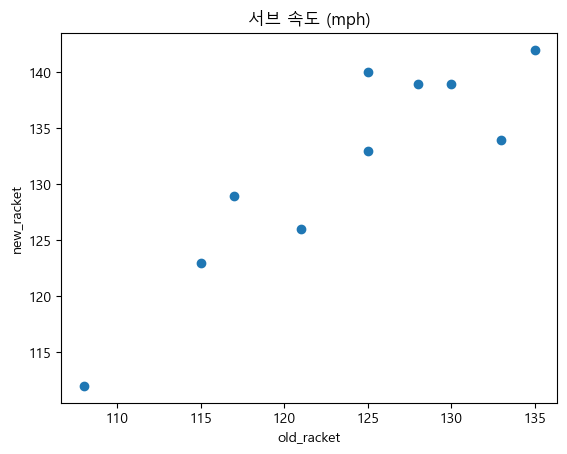

In [8]:
# 연습문제 6 / 예제(10.18), p333

# 무작위로 뽑힌 프로 테니스 선수의 새로 개발된 테니스 라켓과 기존 라켓의 서브 속도를 mph로 나타낸 것이다. 오래된 라켓과 새로운 라켓을 사용한 속도 사이에 플러스 기울기를 가진 관계가 있는지 확인하는 증거를 찾아라.

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

old_racket = [125, 133, 108, 128, 115, 135, 125, 117, 130, 121]
new_racket = [133, 134, 112, 139, 123, 142, 140, 129, 139, 126]

x_mean = np.mean(old_racket)
y_mean = np.mean(new_racket)
numerator = sum((x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(old_racket, new_racket))
denominator = np.sqrt(sum((x_i - x_mean) ** 2 for x_i in old_racket)) * np.sqrt(sum((y_i - y_mean) ** 2 for y_i in new_racket))
r = numerator / denominator

print(f'상관 계수 r: {r:.4f}')

x, y = old_racket, new_racket
n = len(x)
df = n - 2
r = np.corrcoef(x, y)[0, 1]
t = r * np.sqrt(df / (1 - r ** 2))
p_value = 2 * (1 - stats.t.cdf(abs(t), df))

alpha = 0.05
if p_value < alpha:   
    print(f"p-value는 {p_value:.5f}로, 유의 수준 {alpha}보다 작다.\n따라서 귀무 가설을 기각한다.")    
else:
    print(f"p-value는 {p_value:.5f}로, 유의 수준 {alpha}보다 크거나 같다.\n따라서 귀무 가설을 기각할 수 없음") 
    
plt.rc('font', family='Malgun Gothic')
plt.scatter(x, y)
plt.xlabel('old_racket')
plt.ylabel('new_racket')
plt.title('서브 속도 (mph)')
plt.show()